## Randomly Generated Points

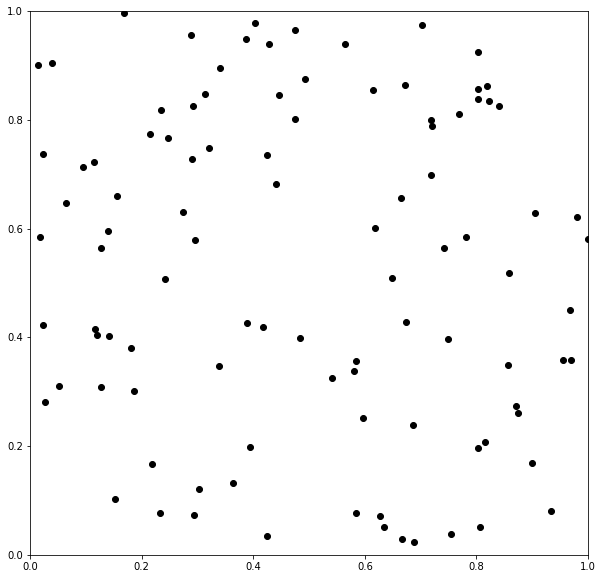

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

fig, ax = plt.subplots(figsize=(10, 10))

samples = []

for i in range(100):
    ax.scatter(rd.random(), rd.random(), color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

## Dart Throwing Points

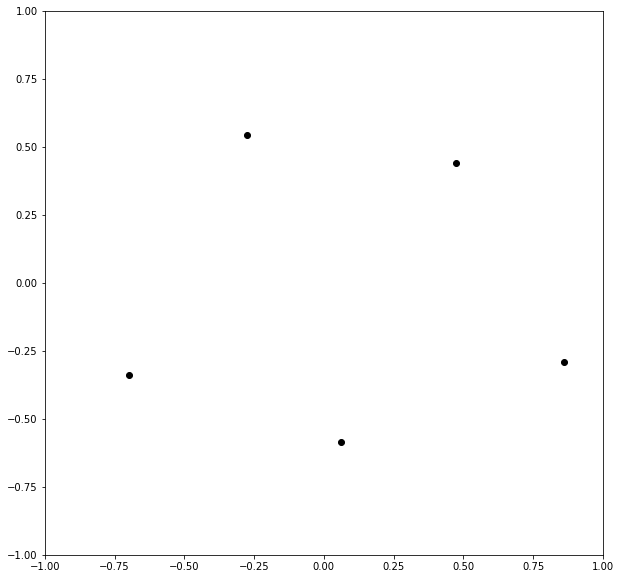

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd
import math

def RandomPointInCircle(radius, u, v):
	S = u
	# S = r2 / R2, choose r based on F
	r = math.sqrt(S) * radius
	theta = v * math.pi * 2.0
	x = r * math.cos(theta)
	y = r * math.sin(theta)

	return x, y

sampleList = []
radius = 0.60
acceptNum = 0
goalNum = 5
while acceptNum < goalNum:
    x,y = RandomPointInCircle(1.0, rd.random(), rd.random())
    randomPoint = [x, y]
    reject = False
    for sampledPoint in sampleList:
        if ((sampledPoint[0] - randomPoint[0]) * (sampledPoint[0] - randomPoint[0]) + (sampledPoint[1] - randomPoint[1])*(sampledPoint[1] - randomPoint[1])) < (radius * radius):
            reject = True
            break
    if not reject:
        sampleList.append(randomPoint)
        acceptNum = acceptNum + 1

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(goalNum):
    ax.scatter(sampleList[i][0], sampleList[i][1], color = [0.0, 0.0, 0.0])

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()


## Weighted Sample Elimination

Source Samples(500 Randomly Generated Points)

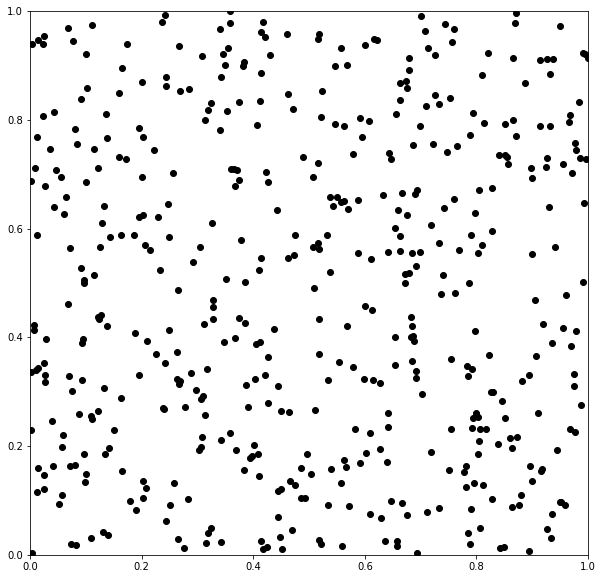

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd

fig, ax = plt.subplots(figsize=(10, 10))

samples = []

# Consistent Seed
rd.seed(12345)

for i in range(500):
    ax.scatter(rd.random(), rd.random(), color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

rmax is 0.0537284965911771 rmin is 0.03179986794588993


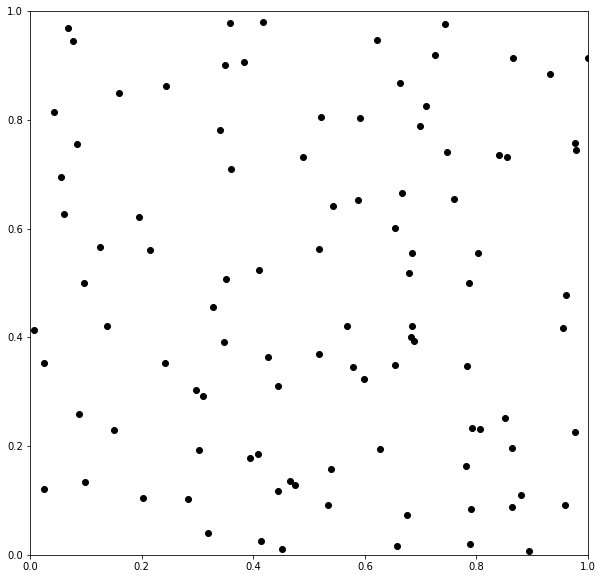

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom
import Library as lib
import random as rd
import scipy.spatial as spatial
import math
# importing "heapq" to implement heap queue 
import heapq 

def dist(pi, pj):
    return math.sqrt((pi[0] - pj[0]) * (pi[0] - pj[0]) + (pi[1] - pj[1]) * (pi[1] - pj[1]))

def rmax2d(A, N):
    return math.sqrt(A / (2 * math.sqrt(3) * N))

def rmin2d(rmax, N, M, gamma = 1.5, beta = 0.65):
    return rmax * (1.0 - ((N / M)**gamma))*beta

def dijHat(dij, rmin, rmax):
    if dij > (2.0 * rmin):
        return min(dij, 2.0 * rmax)
    else:
        return 2.0 * rmin

def weight(dij, rmin, rmax, alpha = 8.0):
    dijHatVal = dijHat(dij, rmin, rmax)
    base = 1.0 - (dijHatVal / (2.0 * rmax))
    return pow(base, 8.0) 

samples = []
sampleMarkers = []

# Consistent Seed
rd.seed(12345)

M = 500
N = 100

for i in range(M):
    samples.append([rd.random(), rd.random()])
    sampleMarkers.append(False)

eliminatedSamples = []
# Weights Store Tuple Values (weight, index)
weights = []
weightMap = {}
kd_tree = spatial.KDTree(samples)
# res = kd_tree.query_ball_point([0.5, 0.5], 0.5)

# Compute R Max
# A = Area Size Of Sampling Space
A2 = 1.0 * 1.0  

rmax = rmax2d(A2, N)
rmin = rmin2d(rmax, N, M)
print("rmax is", rmax, "rmin is", rmin)

# Assign Weights
for i in range(M):
    w = 0
    res = kd_tree.query_ball_point(samples[i], rmax)
    for j in res:
        if i != j:
            dij = dist(samples[i], samples[j])
            wij = weight(dij, rmin, rmax)
            w = w + wij
    item = (-w, i)
    weights.append(item)

# Build Heap
heapq.heapify(weights)

# Generate Samples
remainedCount = M
while remainedCount > N:
    sj = heapq.heappop(weights)

    j = sj[1]
    # print("j is", j)
    # Mark J Eliminated
    sampleMarkers[j] = True
    remainedCount = remainedCount - 1
    
    # Remove Wij From Wi
    res = kd_tree.query_ball_point(samples[j], rmax)

    for i in res:
        if i != j:
            dij = dist(samples[i], samples[j])
            wij = weight(dij, rmin, rmax)
            for weightIndex in range(len(weights)):
                weightItem = weights[weightIndex]
                sampleIndex = weightItem[1]
                if sampleIndex == i: 
                    wi = -weightItem[0] - wij
                    weights[weightIndex] = (-wi, i)
                    heapq.heapify(weights)

remainedSample = []
for i in range(M):
    if sampleMarkers[i] == False:
        remainedSample.append(i)

fig, ax = plt.subplots(figsize=(10, 10))

for i in remainedSample:
    ax.scatter(samples[i][0], samples[i][1], color = [0.0, 0.0, 0.0])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()